<a href="https://colab.research.google.com/github/anil50prasad/hello-world/blob/master/100_Bird_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
!pip uninstall kaggle

Uninstalling kaggle-1.5.6:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.6/dist-packages/kaggle-1.5.6.dist-info/*
    /usr/local/lib/python3.6/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.6


In [ ]:
!pip install --upgrade kaggle

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=45f2e7bd9746e9766f5efae63fd7b7ac1d107b1bf51e338ef15014c90973f1ec
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle


In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.19G/1.19G [00:23<00:00, 67.3MB/s]
100% 1.19G/1.19G [00:23<00:00, 53.6MB/s]


In [ ]:
!unzip -q 100-bird-species.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

idg = ImageDataGenerator(preprocessing_function=preprocess_input, horizontal_flip=True, validation_split=0.2)
train_idg = idg.flow_from_directory('train',target_size=(224,244), batch_size=32, subset='training', )
val_idg = idg.flow_from_directory('train',target_size=(224,244), batch_size=32, subset='validation')

Found 22077 images belonging to 200 classes.
Found 5426 images belonging to 200 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [ ]:
vgg_model = VGG16(include_top=True)

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg_model.layers:
  layer.trainable = False
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f859441ce80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8552319748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8552319240> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8551274be0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8551274a58> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8551292dd8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8551298438> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f855129fd68> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f855129feb8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f85512a3898> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8550fdd5c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [ ]:
x = vgg_model.layers[-2].output
x = BatchNormalization(trainable=False) (x)
x = Dropout(0.5) (x)
x = Dense(200, activation=softmax) (x)

In [ ]:
final_model = Model(inputs=vgg_model.input, outputs=x)
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
final_model.compile(SGD(learning_rate=0.01), categorical_crossentropy, ['acc'])

In [ ]:
model_history = final_model.fit(train_idg, validation_data=val_idg, epochs=10)

Epoch 1/10
690/690 [==============================] - 302s 438ms/step - loss: 2.2957 - acc: 0.5241 - val_loss: 0.8166 - val_acc: 0.7912
Epoch 2/10
690/690 [==============================] - 296s 429ms/step - loss: 0.9480 - acc: 0.7595 - val_loss: 0.6326 - val_acc: 0.8358
Epoch 3/10
690/690 [==============================] - 296s 429ms/step - loss: 0.7391 - acc: 0.8095 - val_loss: 0.6393 - val_acc: 0.8483
Epoch 4/10
690/690 [==============================] - 296s 429ms/step - loss: 0.6144 - acc: 0.8377 - val_loss: 0.5792 - val_acc: 0.8570
Epoch 5/10
690/690 [==============================] - 296s 429ms/step - loss: 0.5238 - acc: 0.8590 - val_loss: 0.5398 - val_acc: 0.8621
Epoch 6/10
690/690 [==============================] - 296s 429ms/step - loss: 0.4535 - acc: 0.8734 - val_loss: 0.5417 - val_acc: 0.8644
Epoch 7/10
690/690 [==============================] - 296s 429ms/step - loss: 0.4223 - acc: 0.8828 - val_loss: 0.5499 - val_acc: 0.8653
Epoch 8/10
690/690 [============================

In [ ]:
#del final_model

#VGG, SGD(0.01)

Epoch 1/10
690/690 [==============================] - 302s 438ms/step - loss: 2.2957 - acc: 0.5241 - val_loss: 0.8166 - val_acc: 0.7912
Epoch 2/10
690/690 [==============================] - 296s 429ms/step - loss: 0.9480 - acc: 0.7595 - val_loss: 0.6326 - val_acc: 0.8358
Epoch 3/10
690/690 [==============================] - 296s 429ms/step - loss: 0.7391 - acc: 0.8095 - val_loss: 0.6393 - val_acc: 0.8483
Epoch 4/10
690/690 [==============================] - 296s 429ms/step - loss: 0.6144 - acc: 0.8377 - val_loss: 0.5792 - val_acc: 0.8570
Epoch 5/10
690/690 [==============================] - 296s 429ms/step - loss: 0.5238 - acc: 0.8590 - val_loss: 0.5398 - val_acc: 0.8621
Epoch 6/10
690/690 [==============================] - 296s 429ms/step - loss: 0.4535 - acc: 0.8734 - val_loss: 0.5417 - val_acc: 0.8644
Epoch 7/10
690/690 [==============================] - 296s 429ms/step - loss: 0.4223 - acc: 0.8828 - val_loss: 0.5499 - val_acc: 0.8653
Epoch 8/10
690/690 [==============================] - 296s 429ms/step - loss: 0.3735 - acc: 0.8955 - val_loss: 0.5340 - val_acc: 0.8747
Epoch 9/10
690/690 [==============================] - 296s 429ms/step - loss: 0.3540 - acc: 0.8998 - val_loss: 0.5304 - val_acc: 0.8664
Epoch 10/10
690/690 [==============================] - 296s 429ms/step - loss: 0.3396 - acc: 0.9047 - val_loss: 0.5210 - val_acc: 0.8774

In [ ]:
import matplotlib.pyplot as plt


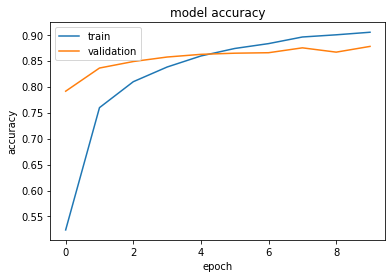

In [ ]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
final_model.to_json()

'{"class_name": "Model", "config": {"name": "model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "block1_conv1", "trainable": false, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "block1_conv1", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "block1_conv2", "trainable": false, "dtype": "float32", "filters": 64, "kern

In [ ]:
final_model.save_weights('100-bird-species.h5') #save only weights

In [ ]:
with open('100-bird-species.json','w') as m_j:
  m_j.write(final_model.to_json())